<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch03_events.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Events

Assume we run an experiment and get an outcome. We know what the outcome is—that's the whole point of a sample space. This means we can tell whether the outcome we get belongs to some particular **known set of outcomes**. We just look in the set and see if our outcome is there.

For example, we might roll a die and ask **"what is the probability of getting an even number?"** We would like our probability models to be able to predict the probability of **sets of outcomes**.

---

## Definition 3.2: Event

An **event** is a set of outcomes. We will usually write events as sets (e.g., $E$).

Assume we are given a discrete sample space $\Omega$. A natural choice of an **event space** is the collection of **all subsets** of $\Omega$.

### Key Properties

1. The set of all outcomes, $\Omega$, must be an event with $P(\Omega) = 1$
2. The empty set $\emptyset$ is an event with $P(\emptyset) = 0$
3. Any given outcome must be an event
4. If $E$ and $F$ are disjoint events, then $P(E \cup F) = P(E) + P(F)$

---

## Useful Facts 3.1: Basic Properties

### Property 1: Bounded Probabilities
$$0 \leq P(A) \leq 1 \text{ for any event } A$$

### Property 2: Certainty
$$P(\Omega) = 1$$

### Property 3: Additivity for Disjoint Events

For disjoint events $A_i$ (where $A_i \cap A_j = \emptyset$ when $i \neq j$):

$$P\left(\bigcup_i A_i\right) = \sum_i P(A_i)$$

---

## 3.2.1 Computing Event Probabilities by Counting

For **equally likely outcomes**:

$$P(F) = \frac{\text{Number of outcomes in } F}{\text{Total number of outcomes in } \Omega}$$

```{admonition} Remember This
:class: important
Compute probabilities of events by counting outcomes when all outcomes are equally likely.


---

## Worked Example 3.5: Odd Numbers with Fair Dice

**Problem**: Throw a fair six-sided die **twice**, then add the numbers. What is the probability of getting an odd number?

**Solution**: There are 36 outcomes, each with probability $\frac{1}{36}$. Eighteen give an odd number, so:

$$P(\text{odd}) = \frac{18}{36} = \frac{1}{2}$$

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Generate all outcomes
dice_outcomes = list(itertools.product(range(1, 7), repeat=2))
sums = [d1 + d2 for d1, d2 in dice_outcomes]
odd_sums = [s for s in sums if s % 2 == 1]

print(f"Total outcomes: {len(dice_outcomes)}")
print(f"Odd sums: {len(odd_sums)} ({len(odd_sums)/36:.1%})")
print(f"Even sums: {36-len(odd_sums)} ({(36-len(odd_sums))/36:.1%})")

Total outcomes: 36
Odd sums: 18 (50.0%)
Even sums: 18 (50.0%)



---

## Worked Example 3.6: Numbers Divisible by Five

**Problem**: Throw two fair dice, add the numbers. What is $P(\text{divisible by 5})$?

**Solution**: Spots must add to 5 or 10.
- **4 ways to get 5**: $(1,4), (2,3), (3,2), (4,1)$
- **3 ways to get 10**: $(4,6), (5,5), (6,4)$

$$P(\text{div by 5}) = \frac{7}{36} \approx 0.194$$

In [2]:
div_by_5 = [(i,j) for i,j in dice_outcomes if (i+j) % 5 == 0]
print(f"Outcomes: {div_by_5}")
print(f"P(divisible by 5) = {len(div_by_5)}/36 = {len(div_by_5)/36:.4f}")

Outcomes: [(1, 4), (2, 3), (3, 2), (4, 1), (4, 6), (5, 5), (6, 4)]
P(divisible by 5) = 7/36 = 0.1944



---

## Worked Example 3.7: Children1

**Problem**: Couple has 3 children. Boys and girls equally likely. Let $B_i$ = event of $i$ boys, $C$ = more girls than boys. Find $P(B_1)$ and $P(C)$.

**Solution**: 8 outcomes, all equally likely:

$\{BBB, BBG, BGB, BGG, GBB, GBG, GGB, GGG\}$

- 3 outcomes have 1 boy: $P(B_1) = \frac{3}{8}$
- 4 outcomes have more girls: $P(C) = \frac{1}{2}$

---

## Worked Example 3.8: Fictitious Outcomes

**Problem**: Have children until first girl or until 3. Find $P(B_1)$ and $P(C)$.

**Solution**: Use fictitious later births (lowercase):
- 1 girl: $\{Gbb, Gbg, Ggb, Ggg\}$ → $P = \frac{1}{2}$
- Boy then girl: $\{BGb, BGg\}$ → $P = \frac{1}{4}$
- 2 boys then girl: $\{BBG\}$ → $P = \frac{1}{8}$
- 3 boys: $\{BBB\}$ → $P = \frac{1}{8}$

Thus: $P(B_1) = \frac{1}{4}$, $P(C) = \frac{1}{2}$

---

## Permutations and Combinations

### Permutations
Number of ways to order $N$ items: $N!$

### Combinations
Choose $k$ from $N$ (order doesn't matter):
$$\binom{N}{k} = \frac{N!}{k!(N-k)!}$$

---

## Worked Example 3.9: Card Hands (Ordered)

**Problem**: Draw 7 cards. Probability of 2-8 hearts **in that order**?

**Solution**: 
- Total orderings: $52!$
- Favorable: first 7 are 2-8 hearts in order, remaining 45 arbitrary: $45!$

$$P = \frac{45!}{52!} \approx 1.2 \times 10^{-12}$$

---

## Worked Example 3.10: Card Hands (Unordered)

**Problem**: Draw 7 cards. Probability of 2-8 hearts **in any order**?

**Solution Method 1**: 
$$P = \frac{7! \cdot 45!}{52!}$$

**Method 2** (combinations):
- Total hands: $\binom{52}{7}$
- Favorable: 1

$$P = \frac{1}{\binom{52}{7}} \approx 6.2 \times 10^{-9}$$

In [3]:
from scipy.special import comb
n_hands = comb(52, 7, exact=True)
print(f"Total 7-card hands: {n_hands:,}")
print(f"P(2-8 hearts any order) = 1/{n_hands:,} = {1/n_hands:.4e}")

Total 7-card hands: 133,784,560
P(2-8 hearts any order) = 1/133,784,560 = 7.4747e-09



---

## Worked Example 3.11: Any Suit

**Problem**: Draw 7 cards. Probability of 2-8 **of any suit**?

**Solution**: Each card can be any of 4 suits:
$$P = \frac{4^7}{\binom{52}{7}} = \frac{16384}{133784560} \approx 0.0001$$

---

## 3.2.2 The Probability of Events

### The Size Analogy

Think of probability as "size" relative to $\Omega$ (which has size 1).

**Venn Diagrams** help visualize:

1. **Complement**: $A$ and $A^c$ partition $\Omega$
   $$P(A) + P(A^c) = 1$$

2. **Set Difference**: Part of $A$ not in $B$
   $$P(A - B) = P(A) - P(A \cap B)$$

3. **Union**: Add sizes, subtract intersection
   $$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

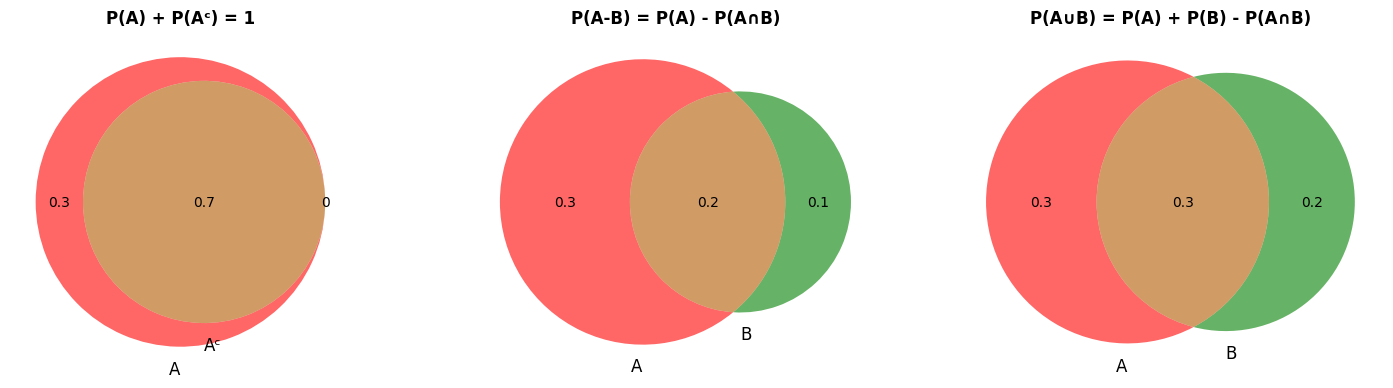

In [5]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Complement
ax = axes[0]
venn2(subsets=(0.3, 0, 0.7), set_labels=('A', 'Aᶜ'), ax=ax, alpha=0.6)
ax.set_title('P(A) + P(Aᶜ) = 1', fontweight='bold')

# Set difference
ax = axes[1]
venn2(subsets=(0.3, 0.1, 0.2), set_labels=('A', 'B'), ax=ax, alpha=0.6)
ax.set_title('P(A-B) = P(A) - P(A∩B)', fontweight='bold')

# Union
ax = axes[2]
venn2(subsets=(0.3, 0.2, 0.3), set_labels=('A', 'B'), ax=ax, alpha=0.6)
ax.set_title('P(A∪B) = P(A) + P(B) - P(A∩B)', fontweight='bold')

plt.tight_layout()
plt.show()


---

## Useful Facts 3.2: Properties of Events

| Property | Formula |
|----------|--------|
| Complement | $P(A^c) = 1 - P(A)$ |
| Empty set | $P(\emptyset) = 0$ |
| Set difference | $P(A - B) = P(A) - P(A \cap B)$ |
| Union | $P(A \cup B) = P(A) + P(B) - P(A \cap B)$ |

### Proofs

**Prop**: $P(A^c) = 1 - P(A)$

**Proof**: $A^c$ and $A$ are disjoint, and $A^c \cup A = \Omega$, so:
$$P(A^c) + P(A) = P(\Omega) = 1$$

**Prop**: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

**Proof**: $A \cup B = A \cup (B - A)$ where $A$ and $B-A$ are disjoint:
$$P(A \cup B) = P(A) + P(B - A)$$

Now $P(B - A) = P(B) - P(A \cap B)$, giving the result. $\square$

---

## 3.2.3 Computing with Set Operations

### Worked Example 3.12: The Birthday Problem

**Problem**: In a room of 30 people, what is $P(\text{shared birthday})$?

**Solution**: Use complement:
$$P(\text{shared}) = 1 - P(\text{all different})$$

$$P(\text{all different}) = \frac{365 \times 364 \times \cdots \times 336}{365^{30}}$$

$$P(\text{shared}) \approx 1 - 0.29 = 0.71$$

**71% chance with just 30 people!**

In [6]:
def birthday_prob(n, days=365):
    if n > days:
        return 1.0
    prob_all_diff = 1.0
    for i in range(n):
        prob_all_diff *= (days - i) / days
    return 1 - prob_all_diff

for n in [10, 20, 23, 30, 50]:
    print(f"{n:2d} people: P(shared) = {birthday_prob(n):.4f}")

# Find n for P > 50%
for n in range(1, 100):
    if birthday_prob(n) > 0.5:
        print(f"\nSmallest n for P>50%: {n}")
        break

10 people: P(shared) = 0.1169
20 people: P(shared) = 0.4114
23 people: P(shared) = 0.5073
30 people: P(shared) = 0.7063
50 people: P(shared) = 0.9704

Smallest n for P>50%: 23



**Visualization:**

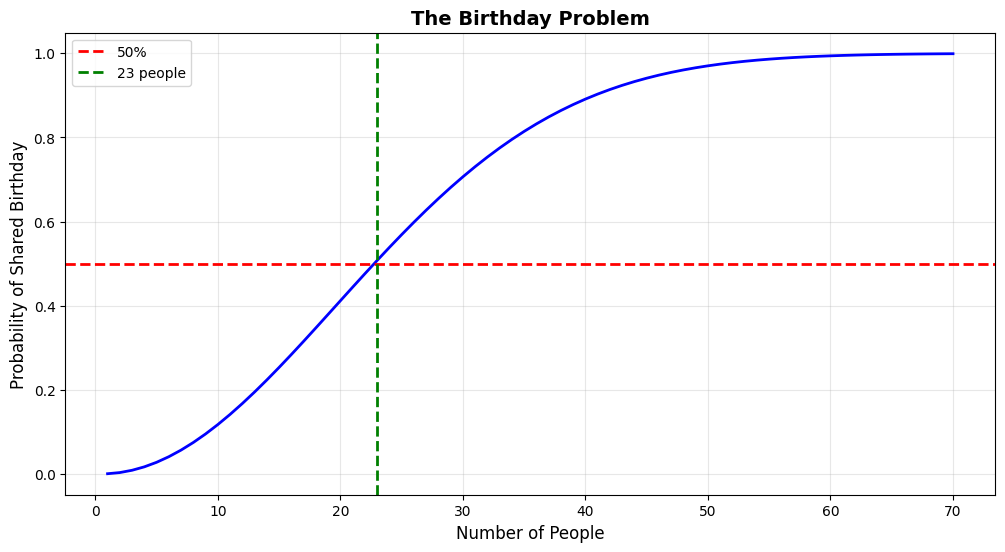

In [7]:
n_values = range(1, 71)
probs = [birthday_prob(n) for n in n_values]

plt.figure(figsize=(12, 6))
plt.plot(n_values, probs, linewidth=2, color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='50%')
plt.axvline(x=23, color='green', linestyle='--', linewidth=2, label='23 people')
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Probability of Shared Birthday', fontsize=12)
plt.title('The Birthday Problem', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


---

### Worked Example 3.13: Your Birthday

**Problem**: In a room of 30 people, what is $P(\text{someone shares YOUR birthday})$?

**Solution**: 
$$P(\text{winning}) = 1 - \left(\frac{364}{365}\right)^{29} \approx 0.077$$

**Only 7.7%!** Very different from 71% in Example 3.12.

In [8]:
prob_your_bday = 1 - (364/365)**29
print(f"P(someone shares YOUR birthday) = {prob_your_bday:.4f}")
print(f"vs P(any two share) = {birthday_prob(30):.4f}")
print(f"Ratio: {birthday_prob(30)/prob_your_bday:.1f}x")

P(someone shares YOUR birthday) = 0.0765
vs P(any two share) = 0.7063
Ratio: 9.2x



---

### Worked Example 3.14: Dice Divisibility

**Problem**: Roll two dice, add spots. Find $P(\text{div by 2 but not 5})$.

**Solution**: Let $D_n$ = "divisible by $n$"

- $P(D_2) = \frac{1}{2}$ (symmetry)
- $D_2 \cap D_5$ = divisible by 10: outcomes $(4,6), (5,5), (6,4)$
- $P(D_2 \cap D_5) = \frac{3}{36}$

$$P(D_2 - D_5) = P(D_2) - P(D_2 \cap D_5) = \frac{1}{2} - \frac{3}{36} = \frac{15}{36}$$

---

### Worked Example 3.15: Union Example

**Problem**: Roll two dice. Find $P(\text{div by 2 OR 5})$.

**Solution**: 
$$P(D_2 \cup D_5) = P(D_2) + P(D_5) - P(D_2 \cap D_5)$$
$$= \frac{18}{36} + \frac{7}{36} - \frac{3}{36} = \frac{22}{36}$$

In [9]:
dice = [(i,j) for i in range(1,7) for j in range(1,7)]
d2 = [(i,j) for i,j in dice if (i+j)%2==0]
d5 = [(i,j) for i,j in dice if (i+j)%5==0]
d2_and_d5 = [(i,j) for i,j in dice if (i+j)%10==0]
d2_or_d5 = [(i,j) for i,j in dice if (i+j)%2==0 or (i+j)%5==0]

print(f"P(D₂) = {len(d2)}/36 = {len(d2)/36:.4f}")
print(f"P(D₅) = {len(d5)}/36 = {len(d5)/36:.4f}")
print(f"P(D₂∩D₅) = {len(d2_and_d5)}/36 = {len(d2_and_d5)/36:.4f}")
print(f"P(D₂∪D₅) = {len(d2_or_d5)}/36 = {len(d2_or_d5)/36:.4f}")
print(f"Check: {len(d2)/36 + len(d5)/36 - len(d2_and_d5)/36:.4f}")

P(D₂) = 18/36 = 0.5000
P(D₅) = 7/36 = 0.1944
P(D₂∩D₅) = 3/36 = 0.0833
P(D₂∪D₅) = 22/36 = 0.6111
Check: 0.6111



---

## Summary

### Key Concepts

1. **Events** are sets of outcomes
2. **Count outcomes** when equally likely
3. **Use complement** for "at least one" problems
4. **Venn diagrams** visualize relationships
5. **Birthday problem** shows counterintuitive results

### Important Formulas

| Formula | Use |
|---------|-----|
| $P(F) = \frac{|F|}{|\Omega|}$ | Equally likely outcomes |
| $P(A^c) = 1 - P(A)$ | Complement rule |
| $P(A \cup B) = P(A) + P(B) - P(A \cap B)$ | Inclusion-exclusion |
| $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ | Combinations |

### Problem-Solving Techniques

1. **Counting**: When outcomes equally likely
2. **Complement**: When "not all" or "at least one"
3. **Fictitious outcomes**: Simplify sample space
4. **Permutations/combinations**: Ordering problems
5. **Inclusion-exclusion**: Union probabilities

---

## Practice Problems

1. Roll two dice. Find $P(\text{sum} > 9)$
2. Flip 3 coins. Find $P(\text{at least 2 heads})$
3. Draw 5 cards. Find $P(\text{all same suit})$
4. Birthday problem: Find $n$ for $P(\text{shared}) > 0.9$
5. If $P(A)=0.6$, $P(B)=0.4$, $P(A \cap B)=0.2$, find:
   - $P(A \cup B)$
   - $P(A^c)$
   - $P(A - B)$

---

→ Next: [3.3 Independence](ch03_independence.md)

→ Return to [Chapter 3 Overview](chapter03.md)

---

**Key Takeaway**: Events and counting form the foundation of probability. The complement rule and inclusion-exclusion are your most powerful tools!